In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


df = pd.read_csv("Employee.csv")


In [2]:
# Unique values and their counts
unique_values = {col: {'Unique Values': df[col].unique(), 'Count': df[col].nunique()} for col in df.columns}
print("Unique values and counts:\n", unique_values)

# Statistical summary
print("\nStatistical Summary:\n", df.describe(include='all'))

# Renaming columns
df.columns = [col.strip().lower() for col in df.columns]
df.rename(columns={'company': 'company_name'}, inplace=True)


Unique values and counts:
 {'Company': {'Unique Values': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object), 'Count': 6}, 'Age': {'Unique Values': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.]), 'Count': 29}, 'Salary': {'Unique Values': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.]), 'Count': 40}, 'Place': {'Unique Values': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object), 'Count': 11}, 'Country': {'Unique Values': arr

In [3]:
# Check for missing values
print("\nMissing Values Before Treatment:\n", df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Replace age = 0 with NaN
df['age'] = df['age'].replace(0, np.nan)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['salary'].fillna(df['salary'].median(), inplace=True)

# Check missing after treatment
print("\nMissing Values After Treatment:\n", df.isnull().sum())

# Outlier Detection (IQR)
Q1 = df[['age', 'salary']].quantile(0.25)
Q3 = df[['age', 'salary']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['age', 'salary']] < (Q1 - 1.5 * IQR)) | (df[['age', 'salary']] > (Q3 + 1.5 * IQR)))
print("\nOutlier Count:\n", outliers.sum())



Missing Values Before Treatment:
 company_name     8
age             18
salary          24
place           14
country          0
gender           0
dtype: int64

Missing Values After Treatment:
 company_name     8
age              0
salary           0
place           14
country          0
gender           0
dtype: int64

Outlier Count:
 age       0
salary    0
dtype: int64


C:\Users\jobin jose\AppData\Local\Temp\ipykernel_4472\1743302301.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\jobin jose\AppData\Local\Temp\ipykernel_4472\1743302301.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


Filtered Data (age > 40 & salary < 5000):
     company_name   age  salary      place country  gender
21       Infosys  50.0  3184.0      Delhi   India       0
32       Infosys  45.0  4034.0   Calcutta   India       0
39       Infosys  41.0  3000.0     Mumbai   India       0
50       Infosys  41.0  3000.0    Chennai   India       0
57       Infosys  51.0  3184.0  Hyderabad   India       0
68       Infosys  43.0  4034.0     Mumbai   India       0
75       Infosys  44.0  3000.0     Cochin   India       0
86       Infosys  41.0  3000.0      Delhi   India       0
93       Infosys  54.0  3184.0     Mumbai   India       0
104      Infosys  44.0  4034.0      Delhi   India       0
122      Infosys  44.0  3234.0     Mumbai   India       0
129      Infosys  50.0  3184.0   Calcutta   India       0
138          CTS  44.0  3033.0     Cochin   India       0
140      Infosys  44.0  4034.0  Hyderabad   India       0
145      Infosys  44.0  4034.0      Delhi   India       1


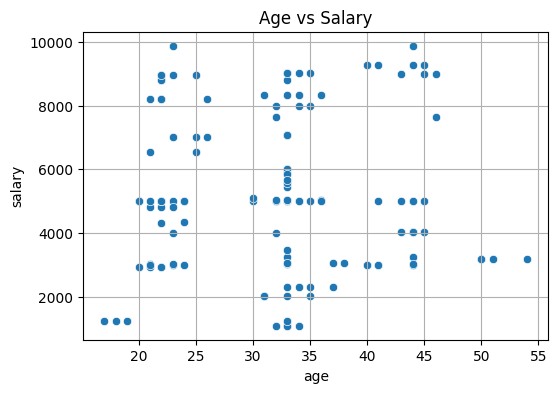

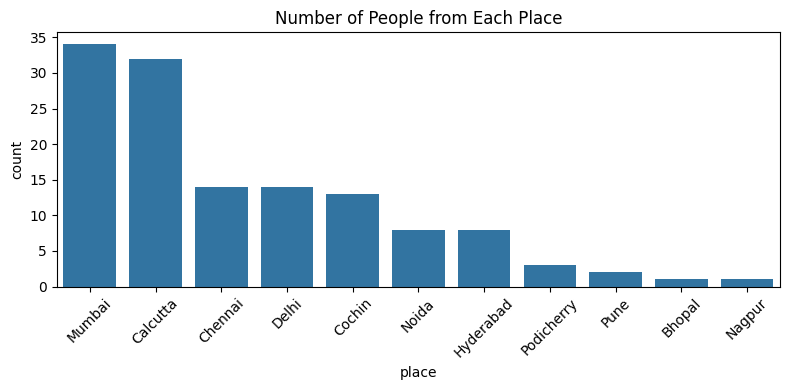

In [4]:
# Filter: age > 40 and salary < 5000
filtered = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("\nFiltered Data (age > 40 & salary < 5000):\n", filtered)

# Plot Age vs Salary
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='salary')
plt.title('Age vs Salary')
plt.grid(True)
plt.show()

# Count of people from each place
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='place', order=df['place'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of People from Each Place')
plt.tight_layout()
plt.show()


In [5]:
# Label Encoding
le = LabelEncoder()
df['company_name'] = le.fit_transform(df['company_name'].astype(str))
df['country'] = le.fit_transform(df['country'].astype(str))
df['gender'] = le.fit_transform(df['gender'].astype(str))

# One-hot encoding for 'place'
df = pd.get_dummies(df, columns=['place'], drop_first=True)


In [6]:
# Standard Scaler
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[['age', 'salary']] = scaler_standard.fit_transform(df_standard[['age', 'salary']])

# MinMax Scaler
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[['age', 'salary']] = scaler_minmax.fit_transform(df_minmax[['age', 'salary']])
